<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Форматы" data-toc-modified-id="Форматы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Форматы</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Преобразование-таблицы" data-toc-modified-id="Преобразование-таблицы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразование таблицы</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Общие-наблюдения" data-toc-modified-id="Общие-наблюдения-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общие наблюдения</a></span></li><li><span><a href="#Распределение-пользователей-по-наличию-приложений-на-разных-платформах" data-toc-modified-id="Распределение-пользователей-по-наличию-приложений-на-разных-платформах-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение пользователей по наличию приложений на разных платформах</a></span></li><li><span><a href="#Территориальное-расположение-пользователей-в-Москве" data-toc-modified-id="Территориальное-расположение-пользователей-в-Москве-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Территориальное расположение пользователей в Москве</a></span></li><li><span><a href="#GMV" data-toc-modified-id="GMV-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>GMV</a></span></li></ul></li><li><span><a href="#Основные-выводы-и-итоги" data-toc-modified-id="Основные-выводы-и-итоги-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Основные выводы и итоги</a></span></li></ul></div>

# Тестовое задание для ВК Музыки

**Данные: информация о 4х компаниях: Red, Black, Green, BLue.**

- hid: зашифрованный персональный идентификатор пользователя компаний
- has_company_id: наличие зарегистрированного аккаунта в компании
- company_gmv_total: суммарный gmv пользователя в сервисе
- company_gvm_order_count: количество успешных заказов пользователя в сервисе
- company_activity_count: количество активных действий пользователя в сервисе
- company_android: установленное у пользователя приложение компании на платформе Android
- company_apple: установленное у пользователя приложение компании на платформе Apple
- company_web: установленное у пользователя приложение компании на ПК
- is_msk: территориальное расположение в Москве

**Задача:** сделать выводы о поведение пользователей в сервисе

**Этапе:** 
1. Выгрузка и знакомство с данными 
2. Подготовка данных (пропуски, дубликаты, формат)
3. анализ данных, выявление закономерностей
4. Выводы

Gross merchandise value (GMV) refers to the value of goods sold via customer-to-customer or e-commerce platforms.

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta
import re

%matplotlib inline 

In [2]:
df = pd.read_excel('Analytic_test.xlsx', skiprows=1)

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,HID,active_Red,has_Green_id,has_Black_id,has_Blue_id,Blue_activity_count,Blue_gmv_total,Green_gvm_total,Green_gvm_order_count,Black_gvm_total,...,Blue_android,Red_apple,Green_apple,Black_apple,Blue_apple,is_msk,Red_web,Green_web,Black_web,Blue_web
0,00003c7fb5e57ce673f1801f3679f5c25,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006b602533083e3bebfcbff08613931,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0000736c3f76339196cb1cc759b8363b,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00009bdcc5307b38efde8690b8bd658e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0000bc3186b7b31d9b35d3fbbb250b9f8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HID                    100000 non-null  object 
 1   active_Red             100000 non-null  float64
 2   has_Green_id           100000 non-null  float64
 3   has_Black_id           100000 non-null  float64
 4   has_Blue_id            100000 non-null  float64
 5   Blue_activity_count    100000 non-null  object 
 6   Blue_gmv_total         99999 non-null   float64
 7   Green_gvm_total        100000 non-null  float64
 8   Green_gvm_order_count  100000 non-null  object 
 9   Black_gvm_total        100000 non-null  float64
 10  Black_gvm_order_count  100000 non-null  object 
 11  Red_android            100000 non-null  float64
 12  Green_android          100000 non-null  float64
 13  Black_android          100000 non-null  float64
 14  Blue_android           100000 non-nul

### Выводы

1. есть данные о 10.000 пользователях
2. есть ошибки в форматах данных в столбцах: Blue_activity_count, Green_gvm_order_count, Black_gvm_order_count
3. столбец Active_Red отличается по названию от аналогичных столбцов для других компаний (они назывются Has_company_id)
4. обо всех четырех компаниях есть следующие показатели: наличие регистрации пользователя, наличие платформы для Android, для Apple, web-интерфейса
5. Данные о GVM (суммарном и по кол-ву заказов) есть только для компаний Blue, Green, Black
6. Данные о кол-ве активных действий пользователя есть только для компании Blue

## Подготовка данных

### Форматы

In [6]:
df['Blue_activity_count'].unique()

array(['2.0', '0.0', '1.0', '17.0', '13.0', '5.0', '6.0', '26.0', '8.0',
       '4.0', '27.0', '19.0', '12.0', '9.0', '3.0', '20.0', '10.0',
       '23.0', '7.0', '16.0', '14.0', '15.0', '53.0',
       datetime.datetime(2019, 5, 4, 0, 0), '32.0', '11.0', '18.0',
       '24.0', '119.0', '49.0', '39.0', '21.0',
       datetime.datetime(2019, 5, 7, 0, 0), '35.0', '72.0', '30.0',
       '71.0', '28.0', '42.0', '34.0', '41.0', '22.0', '29.0', '36.0',
       '90.0', '40.0', '43.0', datetime.datetime(2019, 5, 1, 0, 0),
       '51.0', '44.0', '25.0', '31.0', '45.0', '67.0', '33.0', '101.0',
       '74.0', '46.0', '111.0', '66.0', '38.0', '63.0', '100.0', '237.0',
       '59.0', datetime.datetime(2019, 5, 3, 0, 0),
       datetime.datetime(2019, 5, 6, 0, 0), '37.0', '47.0'], dtype=object)

In [7]:
for i in df['Blue_activity_count']:
    if type(i) == datetime:
        df.drop(df[df.Blue_activity_count == i].index, inplace=True)
        
for i in df['Green_gvm_order_count']:
    if type(i) == datetime:
        df.drop(df[df.Green_gvm_order_count == i].index, inplace=True)
        
for i in df['Black_gvm_order_count']:
    if type(i) == datetime:
        df.drop(df[df.Black_gvm_order_count == i].index, inplace=True)

In [8]:
df.shape

(99987, 24)

In [9]:
df = df.astype({'Blue_activity_count': 'float64', 'Green_gvm_order_count': 'float64', 'Black_gvm_order_count': 'float64'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99987 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HID                    99987 non-null  object 
 1   active_Red             99987 non-null  float64
 2   has_Green_id           99987 non-null  float64
 3   has_Black_id           99987 non-null  float64
 4   has_Blue_id            99987 non-null  float64
 5   Blue_activity_count    99987 non-null  float64
 6   Blue_gmv_total         99986 non-null  float64
 7   Green_gvm_total        99987 non-null  float64
 8   Green_gvm_order_count  99987 non-null  float64
 9   Black_gvm_total        99987 non-null  float64
 10  Black_gvm_order_count  99987 non-null  float64
 11  Red_android            99987 non-null  float64
 12  Green_android          99987 non-null  float64
 13  Black_android          99987 non-null  float64
 14  Blue_android           99987 non-null  float64
 15  Re

### Проверка на дубликаты

In [11]:
df.duplicated().sum()

0

### Преобразование таблицы

In [12]:
df = df.rename(columns={'active_Red': 'has_Red_id'})

In [13]:
df_red = df.query('has_Red_id == 1')
df_blue = df.query('has_Blue_id == 1')
df_black = df.query('has_Black_id == 1')
df_green = df.query('has_Green_id == 1')

In [14]:
for i in df_red.columns:
    if i.find('Red') < 0 and i.find('msk') < 0 and i.find('HID') < 0:
        df_red = df_red.drop([i], axis=1)
df_red = df_red.rename(columns={'has_Red_id': 'has_id', 'Red_android': 'android', 'Red_apple': 'apple', 'Red_web': 'web'})
df_red.insert(1, 'activity_count', None)
df_red.insert(2, 'gmv_total', None)
df_red.insert(3, 'gvm_order_count', None)
df_red['Company'] = 'Red'
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55864 entries, 1 to 99997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HID              55864 non-null  object 
 1   activity_count   0 non-null      object 
 2   gmv_total        0 non-null      object 
 3   gvm_order_count  0 non-null      object 
 4   has_id           55864 non-null  float64
 5   android          55864 non-null  float64
 6   apple            55864 non-null  float64
 7   is_msk           55864 non-null  float64
 8   web              55864 non-null  float64
 9   Company          55864 non-null  object 
dtypes: float64(5), object(5)
memory usage: 4.7+ MB


In [15]:
for i in df_blue.columns:
    if i.find('Blue') < 0 and i.find('msk') < 0 and i.find('HID') < 0:
        df_blue = df_blue.drop([i], axis=1)
        
df_blue = df_blue.rename(columns={'has_Blue_id': 'has_id', 'Blue_activity_count': 'activity_count', 'Blue_gmv_total': 'gmv_total', 'Blue_android': 'android', 'Blue_apple': 'apple', 'Blue_web': 'web'})
df_blue.insert(3, 'gvm_order_count', None)
df_blue['Company'] = 'Blue'

df_blue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12746 entries, 0 to 99992
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HID              12746 non-null  object 
 1   has_id           12746 non-null  float64
 2   activity_count   12746 non-null  float64
 3   gvm_order_count  0 non-null      object 
 4   gmv_total        12746 non-null  float64
 5   android          12746 non-null  float64
 6   apple            12746 non-null  float64
 7   is_msk           12746 non-null  float64
 8   web              12746 non-null  float64
 9   Company          12746 non-null  object 
dtypes: float64(7), object(3)
memory usage: 1.1+ MB


In [16]:
for i in df_green.columns:
    if i.find('Green') < 0 and i.find('msk') < 0 and i.find('HID') < 0:
        df_green = df_green.drop([i], axis=1)

df_green = df_green.rename(columns={'has_Green_id': 'has_id', 'Green_gvm_total': 'gmv_total', 'Green_gvm_order_count': 'gvm_order_count', 
                                    'Green_android': 'android', 'Green_apple': 'apple', 'Green_web': 'web'})
df_green.insert(1, 'activity_count', None)
df_green['Company'] = 'Green'
      
df_green.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 125 to 99969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HID              882 non-null    object 
 1   activity_count   0 non-null      object 
 2   has_id           882 non-null    float64
 3   gmv_total        882 non-null    float64
 4   gvm_order_count  882 non-null    float64
 5   android          882 non-null    float64
 6   apple            882 non-null    float64
 7   is_msk           882 non-null    float64
 8   web              882 non-null    float64
 9   Company          882 non-null    object 
dtypes: float64(7), object(3)
memory usage: 75.8+ KB


In [17]:
for i in df_black.columns:
    if i.find('Black') < 0 and i.find('msk') < 0 and i.find('HID') < 0:
        df_black = df_black.drop([i], axis=1)

df_black = df_black.rename(columns={'has_Black_id': 'has_id', 'Black_gvm_total': 'gmv_total', 'Black_gvm_order_count': 'gvm_order_count', 
                                    'Black_android': 'android', 'Black_apple': 'apple', 'Black_web': 'web'})
df_black.insert(1, 'activity_count', None)
df_black['Company'] = 'Black'
      
df_black.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 323 to 99898
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HID              1074 non-null   object 
 1   activity_count   0 non-null      object 
 2   has_id           1074 non-null   float64
 3   gmv_total        1074 non-null   float64
 4   gvm_order_count  1074 non-null   float64
 5   android          1074 non-null   float64
 6   apple            1074 non-null   float64
 7   is_msk           1074 non-null   float64
 8   web              1074 non-null   float64
 9   Company          1074 non-null   object 
dtypes: float64(7), object(3)
memory usage: 92.3+ KB


In [18]:
total = pd.concat([df_red, df_blue, df_black, df_green])
total.head()

,HID,activity_count,gmv_total,gvm_order_count,has_id,android,apple,is_msk,web,Company
1,00006b602533083e3bebfcbff08613931,None,None,None,1.0,0.0,0.0,0.0,1.0,Red
2,0000736c3f76339196cb1cc759b8363b,None,None,None,1.0,0.0,1.0,0.0,0.0,Red
4,0000bc3186b7b31d9b35d3fbbb250b9f8,None,None,None,1.0,0.0,1.0,0.0,0.0,Red
5,0000c3f7c3075b31690f03025176c601b,None,None,None,1.0,0.0,0.0,0.0,1.0,Red
6,0000c938bb375d76f9725e9c6b3f11bdf,None,None,None,1.0,0.0,0.0,0.0,1.0,Red


In [19]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70566 entries, 1 to 99969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HID              70566 non-null  object 
 1   activity_count   12746 non-null  object 
 2   gmv_total        14702 non-null  object 
 3   gvm_order_count  1956 non-null   object 
 4   has_id           70566 non-null  float64
 5   android          70566 non-null  float64
 6   apple            70566 non-null  float64
 7   is_msk           70566 non-null  float64
 8   web              70566 non-null  float64
 9   Company          70566 non-null  object 
dtypes: float64(5), object(5)
memory usage: 5.9+ MB


In [20]:
total['HID'].duplicated().sum()

9037

In [21]:
total.groupby('Company')['HID'].nunique()

Company
Black     1074
Blue     12746
Green      882
Red      55864
Name: HID, dtype: int64

### Выводы

- неравномерное количество пользователей разных компаний: больше половины из 100.000 пользователей - зарегистрированы в компании Red (55k+), более 12 тысяч - Blue, 1074 - Black, 882 - Green
- более 9 тысяч пользователей зарегистрированы более, чем в 1 компании
- около 30 тысяч пользователей не зарегистрированы нигде

## Анализ данных

### Общие наблюдения

In [22]:
# не зарегистрированы нигде
len(df.query('has_Red_id == 0 and has_Blue_id == 0 and has_Black_id == 0 and has_Green_id == 0'))

38354

In [23]:
# только Red
len(df.query('has_Red_id == 1 and has_Blue_id == 0 and has_Black_id == 0 and has_Green_id == 0'))

46951

In [24]:
# только Blue
len(df.query('has_Red_id == 0 and has_Blue_id == 1 and has_Black_id == 0 and has_Green_id == 0'))

4819

In [25]:
# только Black
len(df.query('has_Red_id == 0 and has_Blue_id == 0 and has_Black_id == 1 and has_Green_id == 0'))

331

In [26]:
# только Green
len(df.query('has_Red_id == 0 and has_Blue_id == 0 and has_Black_id == 0 and has_Green_id == 1'))

390

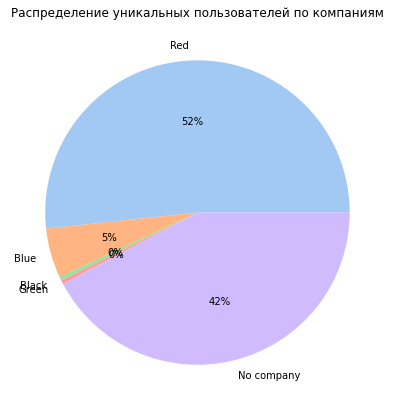

In [57]:
data = [46951, 4819, 331, 390, 38354]
labels = ['Red', 'Blue', 'Black', 'Green', 'No company']

colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10, 7))
plt.title('Распределение уникальных пользователей по компаниям')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Распределение пользователей по наличию приложений на разных платформах

In [27]:
black = 1074
blue = 12746
green = 882
red = 55864

In [28]:
gadjets_pivot = pd.pivot_table(data = total, index='Company', values=['android', 'apple', 'web', 'is_msk'], 
                               aggfunc='sum')
gadjets_pivot

,android,apple,is_msk,web
Company,,,,
Black,232.0,331.0,388.0,172.0
Blue,2867.0,1674.0,2031.0,2806.0
Green,179.0,229.0,675.0,26.0
Red,25104.0,9106.0,6670.0,45538.0


In [29]:
gadjets_pivot = gadjets_pivot.reset_index()
#gadjets_pivot.columns = ['company', 'android', 'apple', 'is_msk', 'web']
gadjets_pivot

,Company,android,apple,is_msk,web
0,Black,232.0,331.0,388.0,172.0
1,Blue,2867.0,1674.0,2031.0,2806.0
2,Green,179.0,229.0,675.0,26.0
3,Red,25104.0,9106.0,6670.0,45538.0


In [30]:
platforms = gadjets_pivot.T
platforms.columns = platforms.iloc[0]
platforms.drop('Company', axis=0, inplace=True)
platforms

Company,Black,Blue,Green,Red
android,232.0,2867.0,179.0,25104.0
apple,331.0,1674.0,229.0,9106.0
is_msk,388.0,2031.0,675.0,6670.0
web,172.0,2806.0,26.0,45538.0


In [31]:
platforms['Black'] = platforms['Black'] / black * 100
platforms['Blue'] = platforms['Blue'] / blue * 100
platforms['Green'] = platforms['Green'] / green * 100
platforms['Red'] = platforms['Red'] / red * 100

In [32]:
platforms

Company,Black,Blue,Green,Red
android,21.60149,22.493331,20.294785,44.937706
apple,30.819367,13.133532,25.963719,16.300301
is_msk,36.126629,15.934411,76.530612,11.939711
web,16.014898,22.01475,2.947846,81.515824


In [33]:
plaforms_nomsk = platforms.drop('is_msk', axis=0)
plaforms_nomsk

Company,Black,Blue,Green,Red
android,21.60149,22.493331,20.294785,44.937706
apple,30.819367,13.133532,25.963719,16.300301
web,16.014898,22.01475,2.947846,81.515824


In [34]:
plta = plaforms_nomsk.unstack(level=0)
plt_df = pd.DataFrame(plta)

In [35]:
plt_df = plt_df.reset_index()
plt_df

,Company,level_1,0
0,Black,android,21.60149
1,Black,apple,30.819367
2,Black,web,16.014898
3,Blue,android,22.493331
4,Blue,apple,13.133532
5,Blue,web,22.01475
6,Green,android,20.294785
7,Green,apple,25.963719
8,Green,web,2.947846
9,Red,android,44.937706


In [36]:
plt_df = plt_df.rename(columns={'level_1': 'platform', 0: '%'})

<AxesSubplot:xlabel='Company', ylabel='%'>

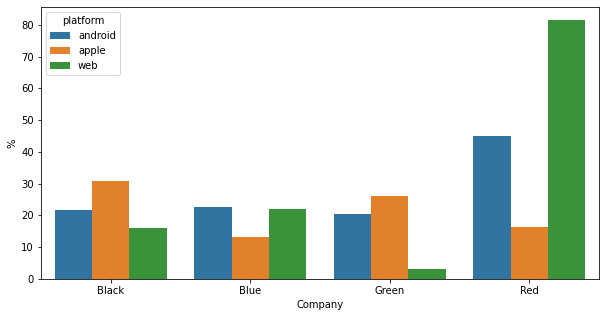

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(data=plt_df, x="Company", y="%", hue="platform")

Для компаний **Black** и **Green** характерно наличие у наибольшего количества пользователей приложения на платформе Apple (30%, 26%, соответственно). Однако если разница в доле пользователей компании **Black**, использующих приложения для Android и Web не слишком серьезная, то в компании **Green** критически мало пользователей используют ПК (всего лишь около 3%). Пользователи компании **Blue** практически в равной степени используют версии для Android и ПК (по 22% пользователей). 

Для компании **Red** стоит отметить, что более 80% пользователей имеют приложения на своих ПК, что является наибольшим значением для среди всех компаний. Более 40% пользователей пользуются приложением на Android, 16% - на платформе Apple. 

### Территориальное расположение пользователей в Москве

In [38]:
mos = platforms.drop(['android', 'apple', 'web'], axis = 0)
mos

Company,Black,Blue,Green,Red
is_msk,36.126629,15.934411,76.530612,11.939711


Наибольшая доля пользователей из Москвы - в компании Green (более 76%). В компаниях Red и Blue процент пользователей из Москвы схож: 12% и 16%, соответственно. Значительно меньше зарегистрированных в Москве пользователей у компании Black, всего 3%. 

### GMV

In [39]:
gmv_total = total.query('gmv_total >=0')

In [40]:
gmv_zero = total.query('gmv_total ==0')

In [41]:
gmv_total['gmv_total'] = gmv_total['gmv_total'].astype('float64')

<ipython-input-41-cb225fd3d880>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gmv_total['gmv_total'] = gmv_total['gmv_total'].astype('float64')


In [42]:
gmv_analysis = pd.DataFrame(gmv_total.groupby('Company')['HID'].nunique())
gmv_analysis['Mean'] = gmv_total.groupby('Company')['gmv_total'].mean()
gmv_analysis['Sum'] = gmv_total.groupby('Company')['gmv_total'].sum()
gmv_analysis['0'] = gmv_zero.groupby('Company')['HID'].nunique()

In [43]:
gmv_analysis

,HID,Mean,Sum,0
Company,,,,
Black,1074,8774.698324,9424026.0,NaN
Blue,12746,18.335478,233704.0,12341.0
Green,882,6782.206349,5981906.0,NaN


In [50]:
gmv_analysis = gmv_analysis.reset_index()
gmv_analysis

,Company,HID,Mean,Sum,0
0,Black,1074,8774.698324,9424026.0,NaN
1,Blue,12746,18.335478,233704.0,12341.0
2,Green,882,6782.206349,5981906.0,NaN


<AxesSubplot:xlabel='Company', ylabel='Mean'>

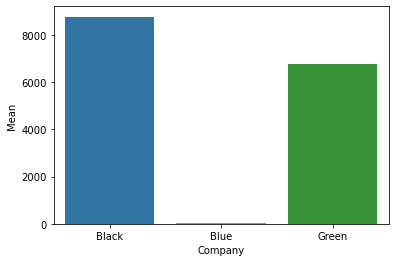

In [51]:
sns.barplot(data = gmv_analysis, x='Company', y='Mean')

В датасете есть данные о суммарных GVM пользователей из компаний Black, Blue, Green. Несмотря на самое большое количество пользователей компании Blue, большинство из них не покупают услуги/продукты компании, так как их GMV равняется нулю. С другой стороны, все пользователи компаний Black и Green тратят определенную сумму денег на услуги/продукты компаний (в среднем на пользователя более 8000 и 6000, соответственно). Можно предположить, что для компании Blue характерно наличие обширного бесплатного пула функций/услуг, в то время как все продукты/услуги других компаний - платные, поскольку в этих компаниях нет ни одного зарегистрированного пользователя, который бы не приобрел что-либо.

In [44]:
gmv_order = total.query('gvm_order_count >= 0')

In [45]:
gmv_order_zero = total.query('gvm_order_count == 0')

In [46]:
gmv_order['gvm_order_count'] = gmv_order['gvm_order_count'].astype('float64')

<ipython-input-46-6f73476c3da7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gmv_order['gvm_order_count'] = gmv_order['gvm_order_count'].astype('float64')


In [47]:
gmv_analysis_order = pd.DataFrame(gmv_order.groupby('Company')['HID'].nunique())
gmv_analysis_order['Mean'] = gmv_order.groupby('Company')['gvm_order_count'].mean()
gmv_analysis_order['Sum'] = gmv_order.groupby('Company')['gvm_order_count'].sum()
gmv_analysis_order['0'] = gmv_order_zero.groupby('Company')['HID'].nunique()

In [48]:
gmv_analysis_order

,HID,Mean,Sum,0
Company,,,,
Black,1074,4.056797,4357.0,NaN
Green,882,8.726757,7697.0,NaN


Данные о количестве успешных заказов есть только для двух компаний **Black** и **Green**. Одновременно с этим, отсуствие нулевого количества заказов также подтверждает вывод о том, что для этих компаний характерно предоставление только платных услуг (отсутствие бесплатных опций => пользователи вынуждены покупать). Суммарное количество успешных заказов значительно больше количества уникальных пользователей каждой компании. Можно предположить, что компании реализируют подписную бизнес модель: пользователи вынуждены платить за определенный период пользования.

## Основные выводы и итоги

**Общие наблюдения:**
- данные о 100.000 пользователей четырех компаний: Red, Blue, Black, Green 
- 38.354 пользователей датасета не зарегистрированы ни в одной из команий, в то время как около 9 тысяч пользователей зарегистрированы более, чем в одной компании
- неравномерное распределение пользователей в датасете по регистрациям в компаниях: больше половины из 100.000 пользователей - зарегистрированы в компании Red (55k+), более 12 тысяч - Blue, 1074 - Black, 882 - Green

**Приложения на разных платформах**
- Для компаний **Black** и **Green** характерно наличие у наибольшего количества пользователей приложения на платформе Apple (30%, 26%, соответственно). Однако если разница в доле пользователей компании **Black**, использующих приложения для Android и Web не слишком серьезная, то в компании **Green** критически мало пользователей используют ПК (всего лишь около 3%). Пользователи компании **Blue** практически в равной степени используют версии для Android и ПК (по 22% пользователей). 
- Для компании **Red** стоит отметить, что более 80% пользователей имеют приложения на своих ПК, что является наибольшим значением для среди всех компаний. Более 40% пользователей пользуются приложением на Android, 16% - на платформе Apple. 

=> Black и Green - компании, ориентированные на мобильные устройства (Android, Apple), в то время как Red - более популярна в рамках пользователей ПК

**Территориальное расположение в Москве**
- Наибольшая доля пользователей из Москвы - в компании Green (более 76%). В компаниях Red и Blue процент пользователей из Москвы схож: 12% и 16%, соответственно. Значительно меньше зарегистрированных в Москве пользователей у компании Black, всего 3%.

**GMV**
- В датасете есть данные о суммарных GVM пользователей из компаний **Black**, **Blue**, **Green**. Несмотря на самое большое количество пользователей компании Blue, большинство из них не покупают услуги/продукты компании, так как их GMV равняется нулю. С другой стороны, все пользователи компаний Black и Green тратят определенную сумму денег на услуги/продукты компаний (в среднем на пользователя более 8000 и 6000, соответственно). Можно предположить, что для компании Blue характерно наличие обширного бесплатного пула функций/услуг, в то время как все продукты/услуги других компаний - платные. 
- Данные о количестве успешных заказов есть только для двух компаний **Black** и **Green**. Одновременно с этим, отсуствие нулевого количества заказов также подтверждает вывод о том, что для этих компаний характерно предоставление только платных услуг (отсутствие бесплатных опций => пользователи вынуждены покупать). Суммарное количество успешных заказов значительно больше количества уникальных пользователей каждой компании. Можно предположить, что компании реализируют подписную бизнес модель: пользователи вынуждены платить за определенный период пользования.